original code analysis

In [14]:
outputfileName= "khordad403_cpu"
inputFile_path= "data/cpu_model.csv"

In [15]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from numpy import argmax
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# get data from preprocesses file
undersampled_outlier_removed_df = pd.read_csv(inputFile_path)
classnames = ['type', 'label', ]
undersampled_outlier_removed_df.dropna(inplace=True)
X = undersampled_outlier_removed_df.drop(['Class', classnames[1]], axis=1)
y = undersampled_outlier_removed_df['Class']


# define example
from keras.utils import to_categorical
# This part of the code converts the class labels into a format
#  that can be used for training a neural network.
#  LabelEncoder converts the class labels into integers, 
# and to_categorical then converts these integer labels into a one-hot encoded format.
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y)
y_cat = to_categorical(y_encode)
y_cat.shape

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

# config nn
n_inputs = X_train.shape[1]
# layers and activators
undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
undersample_model.summary()

# optimizer and metrics
undersample_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# loss_function metrics regulator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# These are callback functions used during training.
#  EarlyStopping stops training when the validation loss 
# hasn’t improved for 10 epochs.
#  ModelCheckpoint saves the best model based on the validation loss.
#  ReduceLROnPlateau reduces the learning rate 
# when the validation loss plateaus.
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(outputfileName+'_dl_model' + '.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 355)               126380    
                                                                 
 dense_1 (Dense)             (None, 32)                11392     
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 137937 (538.82 KB)
Trainable params: 137937 (538.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dl code to create neural network architecture image 

<!-- from keras.utils.vis_utils import plot_model -->

<!-- # Visualizing the model architecture in PNG format
plot_model(undersample_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Visualizing the model architecture in SVG format
plot_model(undersample_model, to_file='model_plot.svg', show_shapes=True, show_layer_names=True) -->


In [16]:


# learn
history = undersample_model.fit(X_train, 
                      y_train, 
                      validation_split=0.2, 
                      batch_size=25, 
                      epochs=20, 
                      shuffle=True, 
                      verbose=2,
                      callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
                      )



Epoch 1/20
2454/2454 - 7s - loss: 0.4612 - accuracy: 0.7745 - val_loss: 0.3902 - val_accuracy: 0.8013 - lr: 0.0010 - 7s/epoch - 3ms/step
Epoch 2/20


c:\Users\OPTIMUS\miniconda3\envs\env_tf\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2454/2454 - 5s - loss: 0.3725 - accuracy: 0.8081 - val_loss: 0.3641 - val_accuracy: 0.8166 - lr: 0.0010 - 5s/epoch - 2ms/step
Epoch 3/20
2454/2454 - 6s - loss: 0.3583 - accuracy: 0.8178 - val_loss: 0.3566 - val_accuracy: 0.8209 - lr: 0.0010 - 6s/epoch - 2ms/step
Epoch 4/20
2454/2454 - 6s - loss: 0.3488 - accuracy: 0.8228 - val_loss: 0.3499 - val_accuracy: 0.8226 - lr: 0.0010 - 6s/epoch - 2ms/step
Epoch 5/20
2454/2454 - 5s - loss: 0.3362 - accuracy: 0.8327 - val_loss: 0.3353 - val_accuracy: 0.8341 - lr: 0.0010 - 5s/epoch - 2ms/step
Epoch 6/20
2454/2454 - 6s - loss: 0.3137 - accuracy: 0.8470 - val_loss: 0.3017 - val_accuracy: 0.8561 - lr: 0.0010 - 6s/epoch - 2ms/step
Epoch 7/20
2454/2454 - 5s - loss: 0.2801 - accuracy: 0.8630 - val_loss: 0.2903 - val_accuracy: 0.8590 - lr: 0.0010 - 5s/epoch - 2ms/step
Epoch 8/20
2454/2454 - 5s - loss: 0.2623 - accuracy: 0.8674 - val_loss: 0.2651 - val_accuracy: 0.8680 - lr: 0.0010 - 5s/epoch - 2ms/step
Epoch 9/20
2454/2454 - 6s - loss: 0.2492 - accuracy:

visualize-- statistic

In [17]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 355)               126380    
                                                                 
 dense_1 (Dense)             (None, 32)                11392     
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 137937 (538.82 KB)
Trainable params: 137937 (538.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


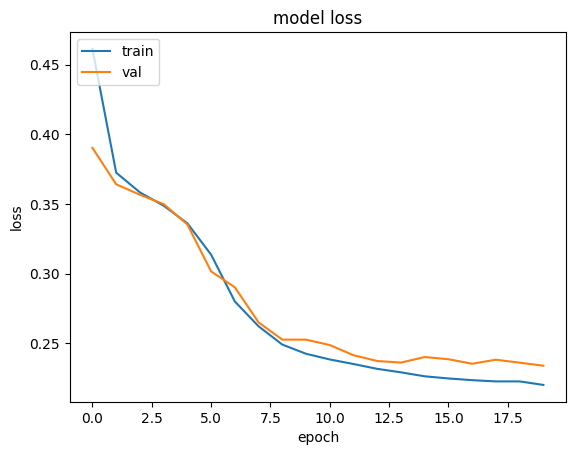

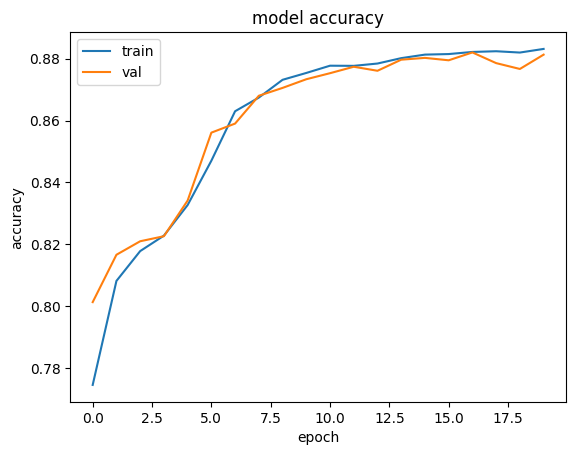

Confusion matrix, without normalization
[[3152  212  111    0    5]
 [  14 3222  746    0    0]
 [  32 1233 2754    0    0]
 [   0    0    0 3808    0]
 [   1    8    0    0 3872]]


0.7806056102545049

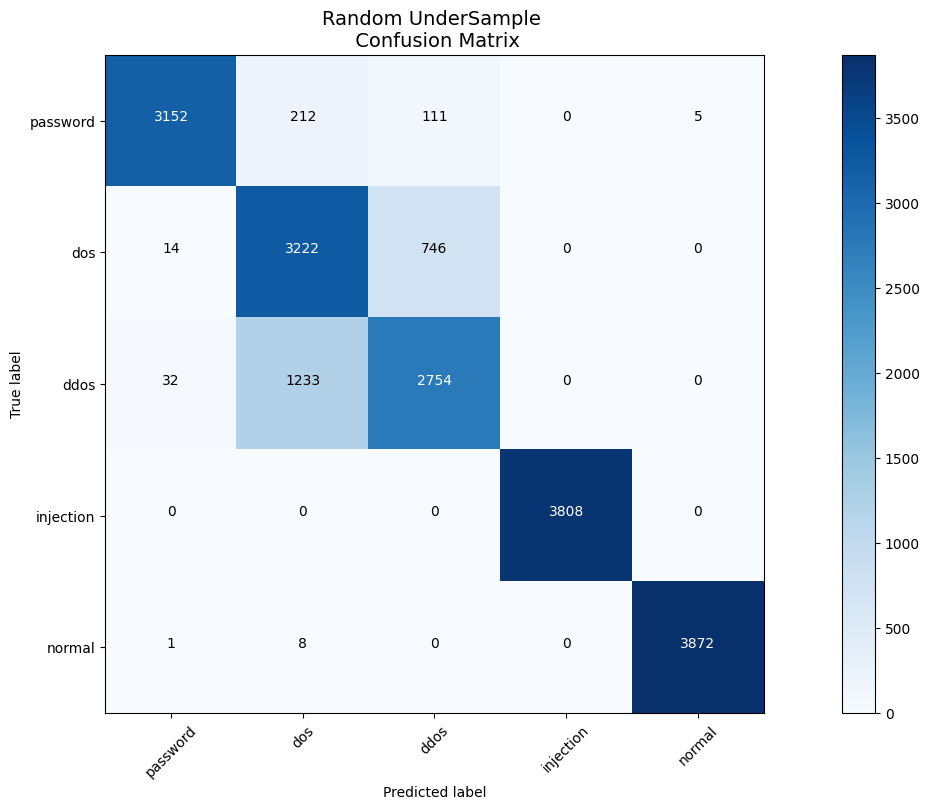

In [18]:

from matplotlib import pyplot as plt


#model loss diagram
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(outputfileName+'_dl_loss.eps', format='eps', dpi=1000)
plt.show()

# retrieve the keys from the history object’s history dictionary.
#  This dictionary stores the history of the training/validation loss 
# and accuracy for each epoch during the model’s training process.
history.history.keys()

# model accuracy diagram
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(outputfileName+'_dl_accuracy.eps', format='eps', dpi=1000)
plt.show()

#s used to generate predictions from the trained deep learning model 
y_pred = undersample_model.predict(X_test, batch_size=200, verbose=0)


#confusion matrix creation
import itertools
# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# matrix output
from sklearn.metrics import confusion_matrix
y_test_argmax = y_test.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)
confusion_matrix(y_test_argmax, 
                 y_pred_argmax
                 )
# plot output
undersample_cm = confusion_matrix(y_test_argmax, y_pred_argmax)
labels = y.unique()
fig = plt.figure(figsize=(16,8))
plot_confusion_matrix(
                        undersample_cm, 
                        labels, 
                        title="Random UnderSample \n Confusion Matrix", 
                        # cmap=plt.cm.Reds
                      )
plt.savefig(outputfileName+'_dl_confusion.eps', format='eps', dpi=1000)

# The argmax function converts the one-hot encoded labels back to
#  their original class integer labels. This is necessary because 
#  the confusion matrix and other metrics calculations
#  expect the true class labels, not the one-hot encoded labels.
y_true = y_test_argmax
y_pred = y_pred_argmax

# metrics creation
from sklearn import metrics
metrics.precision_score(y_true, y_pred, average='macro')
metrics.recall_score(y_true, y_pred, average='micro')
metrics.f1_score(y_true, y_pred, average='weighted')
metrics.fbeta_score(y_true, y_pred, average='macro', beta=0.5)
metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5, average=None)
metrics.recall_score(y_true, y_pred, labels=[1, 2], average='micro')
metrics.precision_score(y_true, y_pred, labels=[0, 1, 2, 3], average='macro')
from sklearn.metrics import jaccard_score
jaccard_score(y_true, y_pred, average="micro")

self attention code

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics

# Define Self-Attention Layer
class SelfAttention(keras.layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(SelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='Attention_Weights',
                                  shape=(input_shape[-1], self.output_dim),
                                  initializer='uniform',
                                  trainable=True)
        self.b = self.add_weight(name='Attention_Bias',
                                  shape=(self.output_dim,),
                                  initializer='uniform',
                                  trainable=True)
        super(SelfAttention, self).build(input_shape)

    def call(self, inputs):
        e = keras.activations.tanh(keras.backend.dot(inputs, self.W) + self.b)
        a = keras.activations.softmax(e, axis=1)
        output = inputs * a
        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], self.output_dim)

# Data Preparation
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y)
y_cat = to_categorical(y_encode)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Model Definition
n_inputs = X_train.shape[1]
undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs,), activation='relu'),
    Dense(64, activation='relu'),
    SelfAttention(output_dim=64),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

undersample_model.summary()

# Model Compilation
undersample_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(outputfileName +'_self_model'+ '.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 355)               126380    
                                                                 
 dense_4 (Dense)             (None, 64)                22784     
                                                                 
 self_attention (SelfAttent  (None, 64)                4160      
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 5)                 165       
                                                                 
Total params: 155569 (607.69 KB)
Trainable params: 155569 (607.69 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [20]:

# Model Training
history = undersample_model.fit(X_train, 
                                y_train, 
                                validation_split=
                                
                                0.2, 
                                batch_size=25, 
                                epochs=30, 
                                shuffle=True, 
                                verbose=2,
                                callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
                               )


Epoch 1/30
2454/2454 - 8s - loss: 0.5354 - accuracy: 0.7418 - val_loss: 0.4217 - val_accuracy: 0.7941 - lr: 0.0010 - 8s/epoch - 3ms/step
Epoch 2/30


c:\Users\OPTIMUS\miniconda3\envs\env_tf\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2454/2454 - 6s - loss: 0.4059 - accuracy: 0.7933 - val_loss: 0.4036 - val_accuracy: 0.7945 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 3/30
2454/2454 - 6s - loss: 0.3875 - accuracy: 0.8036 - val_loss: 0.3953 - val_accuracy: 0.7988 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 4/30
2454/2454 - 6s - loss: 0.3718 - accuracy: 0.8108 - val_loss: 0.3712 - val_accuracy: 0.8060 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 5/30
2454/2454 - 6s - loss: 0.3635 - accuracy: 0.8154 - val_loss: 0.3587 - val_accuracy: 0.8194 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 6/30
2454/2454 - 6s - loss: 0.3501 - accuracy: 0.8221 - val_loss: 0.3609 - val_accuracy: 0.8186 - lr: 0.0010 - 6s/epoch - 2ms/step
Epoch 7/30
2454/2454 - 6s - loss: 0.3147 - accuracy: 0.8414 - val_loss: 0.2865 - val_accuracy: 0.8561 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 8/30
2454/2454 - 6s - loss: 0.2793 - accuracy: 0.8561 - val_loss: 0.2699 - val_accuracy: 0.8586 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 9/30
2454/2454 - 6s - loss: 0.2709 - accuracy:

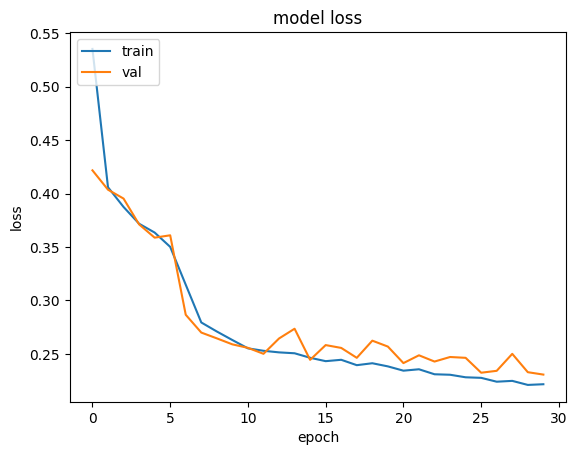

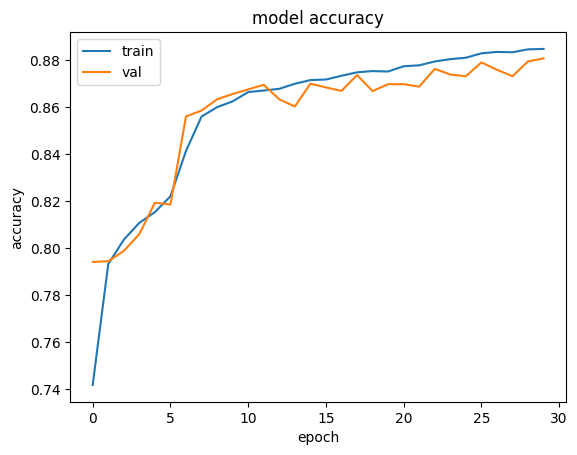

Confusion matrix, without normalization
[[3225  224   30    0    1]
 [  30 3537  414    0    1]
 [  63 1521 2435    0    0]
 [   0    0    0 3808    0]
 [   3    3    0    0 3875]]


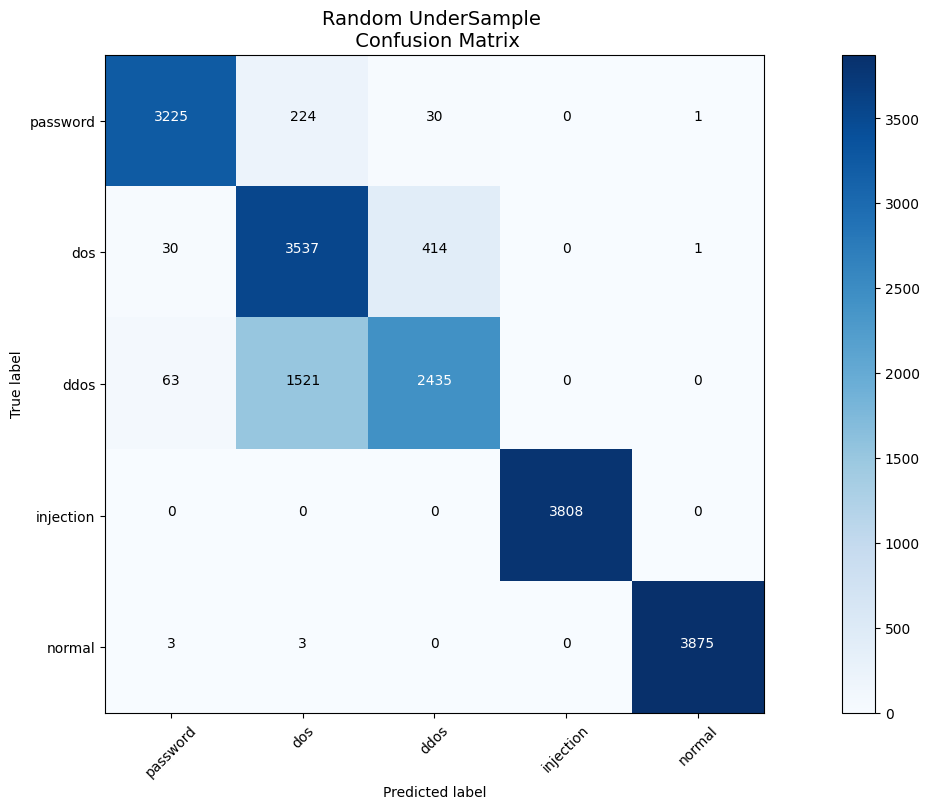

In [21]:




#model loss diagram
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(outputfileName+'_self_loss.eps', format='eps', dpi=1000)
plt.show()

# retrieve the keys from the history object’s history dictionary.
#  This dictionary stores the history of the training/validation loss 
# and accuracy for each epoch during the model’s training process.
history.history.keys()

# model accuracy diagram
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(outputfileName+'_self_accuracy.eps', format='eps', dpi=1000)
plt.show()

#s used to generate predictions from the trained deep learning model 
y_pred = undersample_model.predict(X_test, batch_size=200, verbose=0)


#confusion matrix creation
import itertools
# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# matrix output
from sklearn.metrics import confusion_matrix
y_test_argmax = y_test.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)
confusion_matrix(y_test_argmax, 
                 y_pred_argmax
                 )
# plot output
undersample_cm = confusion_matrix(y_test_argmax, y_pred_argmax)
labels = y.unique()
fig = plt.figure(figsize=(16,8))
plot_confusion_matrix(
                        undersample_cm, 
                        labels, 
                        title="Random UnderSample \n Confusion Matrix", 
                        # cmap=plt.cm.Reds
                      )
plt.savefig(outputfileName+'_self_confusion.eps', format='eps', dpi=1000)

# The argmax function converts the one-hot encoded labels back to
#  their original class integer labels. This is necessary because 
#  the confusion matrix and other metrics calculations
#  expect the true class labels, not the one-hot encoded labels.
y_true = y_test_argmax
y_pred = y_pred_argmax

# metrics creation
from sklearn import metrics
from sklearn.metrics import jaccard_score


In [8]:
metrics.precision_score(y_true, y_pred, average='macro')

0.9807725316484998

In [9]:
metrics.recall_score(y_true, y_pred, average='micro')

0.9805072006982495

In [10]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.9805316950459384

In [11]:
metrics.fbeta_score(y_true, y_pred, average='macro', beta=0.5)

0.9806934165098202

In [12]:
metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5, average=None)

(array([0.99925908, 0.96735836, 0.98721484, 0.95366146, 0.99636892]),
 array([0.9997529 , 0.98457523, 0.9654327 , 0.96174334, 0.99109078]),
 array([0.9993578 , 0.97075339, 0.98278013, 0.95526696, 0.9953088 ]),
 array([4047, 4214, 4079, 4130, 4153], dtype=int64))

In [13]:
metrics.recall_score(y_true, y_pred, labels=[1, 2], average='micro')

0.9751597733027855

In [14]:
metrics.precision_score(y_true, y_pred, labels=[0, 1, 2, 3], average='macro')

0.9768734350762385

In [15]:
jaccard_score(y_true, y_pred, average="micro")

0.9617598097502973